# **Soll- und IST-Fahrzeiten bei der VBZ**
Semesterarbeit im Modul "Business Intelligence + Analytics" (BINA)

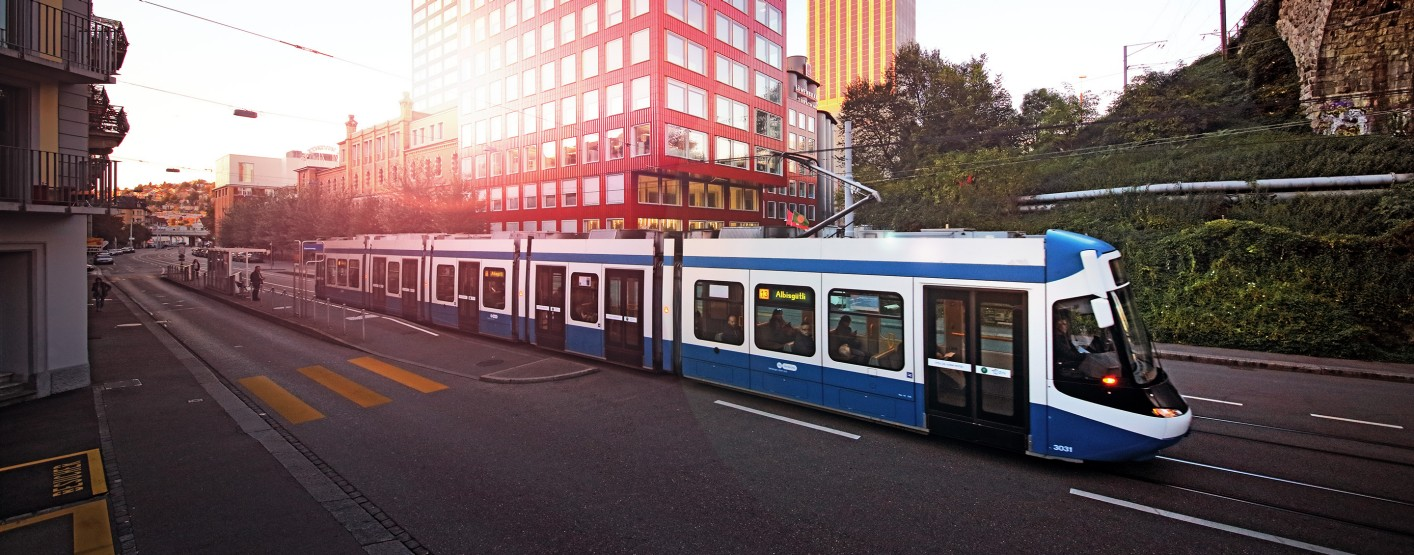

**Studierende**
- Livia Mosberger, livia.mosberger@ost.ch
- Remo Weiersmüller, remo.weiersmueller@stud.hslu.ch
- Yannic Wild, yannic.wild@ost.ch

**Dozent**
Daniel Benninger, daniel.benninger@hslu.ch

**Datum**
16.06.2023

**Eigenständigkeitserklärung**

Wir erklären hiermit, dass wir die vorliegende Arbeit resp. die ausgewiesene Leistung selbständig, ohne Mithilfe Dritter und nur unter Ausnützung der angegebenen Quellen verfasst resp. erbracht haben.

Livia Mosberger

Remo Weiersmüller

Yannic Wild

# Einleitung (Define objectives and information needs)
In dieser Semesterarbeit führt eine Studierendengruppe eine Datananalyse zu einem selbstgewählten Thema durch und beantwortet dazu eine vordefinierte Fragestellung. Diese Datenanalyse befasst sich mit den Soll- und Ist-Fahrzeiten der Verkehrsbetriebe Zürich (VBZ). Dank dieser Datenanalye soll es den VBZ möglich sein, mehr Informationen über die effektiven Fahrzeiten zu erhalten, um so Massnahmen ableiten und den Fahrplan zukünftig besser einhalten zu können.
Für diese Semesterarbeit wurden folgende Fragestellungen bzw. Ziele definiert:
- Visualisierung der Abfahrtsdifferenzen zur Ermittlung der Verspätungen
- Hat die Fahrtrichtung einen Einfluss auf die Verspätung?
- Visualisierung der Haltestellen




## Datenherkunft
Die VBZ sind das kommunale Verkehrsunternehmen der Stadt Zürich. Sie sind ein Departement der Stadtverwaltung Zürich. Die Stadt Zürich hat eine eigene Open-Data-Plattform, auf der Daten zu diversen Kategorien rund um die Stadt Zürich frei zur Verfügung stehen. Die Open-Data-Plattform ist über https://data.stadt-zuerich.ch/ aufrufbar.

Die Daten zu den Fahrzeiten der VBZ liegen als CSV-Dateien vor. Die CSV-Tabellen zeigen die Fahrzeiten jedes Fahrzeuges der VBZ (SOLL) sowie die effektiv gefahrene Zeit (IST). Zudem finden sich Haltestellenauskünfte zu allen Haltestellen der VBZ. Jede Woche wird ein neuer Datensatz (eine neue CSV-Datei) erstellt und auf die Open-Data-Plattform hochgeladen. Die Daten der SOLL-IST-Fahrzeiten aus den Vorjahren liegen ab 2015 vor.

Zusätzlich zu den wöchentlichen Files der SOLL-IST-Fahrzeiten gibt es zwei Matchingtabellen namens "Haltestelle.csv" und "Haltepunkt.csv".

## Eingrenzung
Die Daten von Open Data Zürich liefern Informationen zu allen Bussen und Trams und ihren jeweiligen Linien, und das zu jeder einzelnen Fahrt sekundengenau. Das führt zu einer entsprechend enorm grossen Datenmenge. Darum wird der Fokus für diese Arbeit auf eine einzelne Linie gelegt. Konkret wird nur die Tramlinie 11 betrachtet. Diese Linie wurde gewählt, da es eine der meistfrequentierten Tramlinien in Zürich sind. Die Linie fährt einmal quer durch die Stadt Zürich, nämlich von Auzelg über Oerlikon, den Zürich Hauptbahnhof, Bellevue bis zu Rehalp am Zollikerberg, und natürlich auch in die Gegenrichtung.

Der Fokus wird auf Trams gelegt, da diese im Gegensatz zu Bussen über eigene Spuren verfügen und weniger vom restlichen Verkehr abhängig sind. Somit wird davon ausgegangen, dass eine Verspätung bzw. eine Häufung von Verspätungen eher untersucht werden sollte, da es sich im Gegensatz zu einer Verspätung auf einer Buslinie nicht direkt mit höherem Verkehrsaufkommen begründen lässt.

Da es sich um sehr grosse Datenmengen handelt, werden lediglich die Daten aus dem Jahr 2022 berücksichtigt

## Definitionen
Die Datenanalyse befasst sich damit, wie pünktlich die VBZ auf ihren Linien ist. Dazu muss jedoch bekannt sein, was überhaupt als pünktlich gilt und ab wann eine Verspätung als "unpünktlich" gilt. Dazu wurde die Definition verwendet, die die VBZ selbst nutzt: Eine Fahrt gilt als "Verspätet", wenn die tatsächliche Ankunftszeit (IST) die planmässige Ankunftszeit (SOLL) um mehr als 2 Minuten überschreitet. Zudem gilt eine Fahrt als "zu früh", wenn eine Fahrt um mehr als 1 Minute vor der geplanten Abfahrt erfolgt. Alles dazwischen wird als pünktlich angesehen.
Zur Vereinfachung wird für diese Arbeit eine Abfahrt von plus/minus 2 Minuten als pünktlich angesehen, da die Annahme getroffen wird, dass es wohl sowieso mehr verspätete Abfahrten als zu frühe Abfahrten gibt.

## Genutzte Quellen
Diese Arbeit wurden mit Hilfe des [VBZ-Github-Repository](https://github.com/VerkehrsbetriebeZuerich) erstellt. Für gewisse Erklärungen zu den Codes wurden Python-Lernplattformen wie Codecademy oder Replit,  die Übungsbeispiele aus dem BINA-Unterricht und ChatGPT genutzt. Die Rohdaten stammen von der [Open Data Plattform](https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd) der Stadt Zürich.



# Datenbeschaffung (Collect Data)


## Datenbankschema
Die VBZ stellen auf der Open-Data-Plattform Zürich ein Datenbankschema zur Verfügung. Darauf sind die Inhalte der Datensätze sowie deren Zusammenhang zueinander leicht erkennbar. Zudem wurden auf der Plattform alle einzelnen Spaltenüberschriften / Attribute einzeln beschrieben, sodass diese leichter verständlich sind und die Daten einfacher bearbeitet werden können.


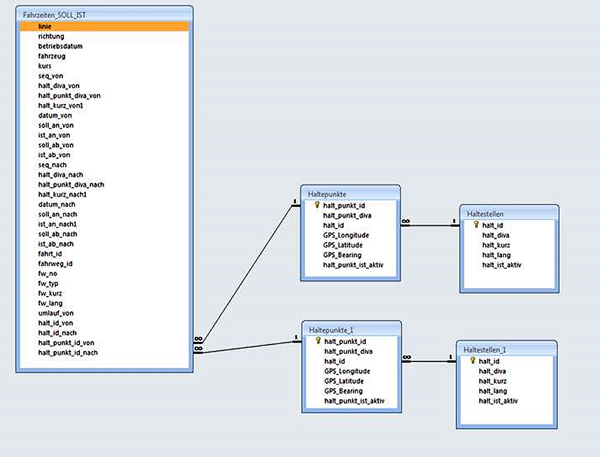

## Verknüpfung Google Drive Ablage
Die verwendeten Datensätze werden in einem Google Drive Ordner abgelegt. Aller Personen, die den Code ausführen möchten, benötigen einen Google Drive Ordner, der identisch benennt ist und der die benötigten Dateien enthält. So ist es mehreren Personen möglich, gemeinsam an einem Code zu arbeiten.

In [1]:
# Mount GDrive and access files at your Google Drive directory
from google.colab import drive
drive.mount("/content/drive")
#drive.mount("/content/drive", force_remount=True)
%cd /content/drive/MyDrive/Colab_Notebooks/BINA/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/BINA
BINA_Fahrzeiten_VBZ.ipynb
Fahrzeiten_SOLL_IST_20220102_20220108.csv
Fahrzeiten_SOLL_IST_20220109_20220115.csv
Haltepunkt.csv
Haltestelle.csv
Linie-11_Fahrzeiten_SOLL_IST_2022.csv
temp-plot.html


In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Haltepunkte
Die Datei "Haltepunkt.csv" enthält Informationen zu jedem Haltepunkt, der von den VBZ bedient wird. Ein Haltepunkt wird mit den GPS-Koordinaten gekennzeichnet. Informationen zum Namen des jeweiligen Haltepunkts (Haltestelle) finden sich in der Datei "Haltestellen.csv".

In [3]:
#read file to see file structure of .csv files of matching table Haltepunkt.csv
haltepunkt = pd.read_csv("Haltepunkt.csv")
haltepunkt

,halt_punkt_id,halt_punkt_diva,halt_id,GPS_Latitude,GPS_Longitude,GPS_Bearing,halt_punkt_ist_aktiv
0,303,51,143,47.360017,8.456337,85.0,False
1,304,50,143,47.360153,8.456180,270.0,False
2,686,50,309,47.368125,8.463072,212.0,False
3,687,51,309,47.368433,8.463819,19.0,False
4,823,51,373,47.452401,8.571871,208.0,False
...,...,...,...,...,...,...,...
19731,55081,51,2020,47.429240,8.391588,314.0,True
19732,55082,51,1540,47.399460,8.448506,172.0,True
19733,55083,50,3010,47.390218,8.393998,NaN,True
19734,55085,51,2649,47.319609,8.584515,338.0,True


In [4]:
#check file structure
haltepunkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19736 entries, 0 to 19735
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   halt_punkt_id         19736 non-null  int64  
 1   halt_punkt_diva       19736 non-null  int64  
 2   halt_id               19736 non-null  int64  
 3   GPS_Latitude          18699 non-null  float64
 4   GPS_Longitude         18699 non-null  float64
 5   GPS_Bearing           15165 non-null  float64
 6   halt_punkt_ist_aktiv  19736 non-null  bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 944.5 KB


## Haltestellen
Die Datei "Haltestellen.csv" enthält Informationen zu jeder Haltestelle, die von den VBZ bedient wird. Hier sind die Haltestellen zum ersten Mal mit dem vollen Namen sichtbar und unterscheidbar.

In [5]:
#read file to see file structure of .csv files of matching table Haltestelle.csv
haltestelle = pd.read_csv("Haltestelle.csv")
haltestelle

,halt_id,halt_diva,halt_kurz,halt_lang,halt_ist_aktiv
0,143,2570,BirWSL,"Birmensdorf ZH, Sternen/WSL",True
1,309,3356,WalBir,"Waldegg, Birmensdorferstrasse",True
2,373,6232,FRAF07,"Zürich Flughafen, Fracht",True
3,539,2655,TBAH01,"Thalwil, Bahnhof",True
4,588,3027,FLUG07,"Zürich Flughafen, Bahnhof",True
...,...,...,...,...,...
764,3336,7069,KLAE,"Kilchberg ZH, Lätten",True
765,3337,7067,KNEU,"Kilchberg ZH, Neuweid",True
766,3338,7070,OBER,"Zürich, Obere Hornhalde",True
767,3339,7065,OGAS,"Oetwil an der Limmat, Gässliacker",True


In [6]:
#check file structure
haltestelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   halt_id         769 non-null    int64 
 1   halt_diva       769 non-null    int64 
 2   halt_kurz       769 non-null    object
 3   halt_lang       769 non-null    object
 4   halt_ist_aktiv  769 non-null    bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 24.9+ KB


## Fahrzeiten-Tabellen
Die VBZ erfassen jede gemachte Fahrt sekundengenau. Das resultiert in einer enormen Datenmenge. Die Fahrtendaten werden dabei pro Woche in einer CSV-Datei zusammengefasst und auf die [Open-Data-Plattform der Stadt Zürich](https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd) hochgeladen. Somit ergeben sich pro Jahr 52 Files, die analysiert werden können. Dieses System macht die VBZ bereits seit 2015, somit sind über die Jahre bereits ca. 500 Datensätze auf die Plattform hochgeladen worden. Eine Datei umfasst rund 250 MB und enthält rund 3.3 Millionen Zeilen. Für die nachfolgende Analyse ist es darum essentiell, diese Daten zu konsolidieren, da es ja das Ziel ist, eine spezifische Linie über einen längeren Zeitraum zu betrachten. Ohne eine vorgängige Konsolidierung wäre die Datenmenge für die Studierenden nicht handlebar, und es macht wenig Sinn, auch die für die Analyse irrelevanten Daten weiter zu behalten.



Für die weitere Bearbeitung müssen die im Datensatz relevanten Spalten eruiert werden. Die VBZ stellt zu jeder Spalte  Infos bereit, die es vereinfachen, die relevanten Spalten zu eruieren.
Relevante Spalten sind:
- linie: Liniennummer 2-20 sind Trams, 31-916 Busse
- kurs: VBZ-interner Streckenkurs, stimmt nicht mit Liniennummer überein
- richtung: Die Richtung wird in 1 oder 2 angegeben
- betriebsdatum: Datum der Aufzeichnung
- soll_an_von: Sollankunft in Sekunden nach Mitternacht. Die Werte gehen von 0 (entspricht 0:00) bis 86399 (entspricht 23:59:59)
- ist_an_von: Ist-Ankunft in Sekunden nach Mitternacht
- soll_ab_von: Soll-Abfahrt der «von»-Haltestellen in Sekunden nach Mitternacht
- ist_ab_von: Ist-Abfahrt der «von»-Haltestellen in Sekunden nach Mitternacht
- halt_punkt_id: Schlüsselfeld Haltepunkt
- halt_id: Schlüsselfeld Haltestelle


### Datenkonsolidierung
Ziel der Datenkonsolidierung ist es, die Informationen der relevanten Linien aus den CSV-Files für das ganze Jahr 2022 zu extrahieren. Diese Informationen werden in einem neuen File gespeichert, welches für die weitere Bearbeitung genutzt werden kann. Dies hat den Vorteil, dass die Datenmenge stark verkleinert wird und die Bearbeitung erleichtert wird. Das wurde mit einem Perl-Script durchgeführt. Perl (Practical Extraction and Reporting Language) ist eine leistungsstarke und vielseitige Skriptsprache. Das Perl-Script, welches für die Zusammenführung verwendet wurde, ist im [Google Drive Ordner BINA](https://drive.google.com/drive/folders/1O361sTfNKwntER6WwsKE2t_mcv6ZhpRU?usp=sharing) abgelegt.
Um das Perl-Script ausführen zu können, muss auf dem ausführenden Gerät die notwendige Perl Compiler installiert sein. Dieser kann under folgendem [Link](https://strawberryperl.com) heruntergeladen werden.




#Visualisierung Abfahrtszeitdifferenzen (Analyse Data / Present Information)
Dieses Kapitel wird jeweils unterteilt in eine Datenanalyse (Analyse Data) und in eine Datenpräsentation (Present Information). Die Datenpräsentation ist dabei jeweils in Textform und bezieht sich auf die vorhergehende grafische Darstellung der analysierten Daten.


In [7]:
#read fahrzeit file which contains collected information for Linie 11
fahrzeit = pd.read_csv('Linie-11_Fahrzeiten_SOLL_IST_2022.csv')
#print preview of file fahrzeit (remove hashtag below)
fahrzeit.info()
fahrzeit


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3281260 entries, 0 to 3281259
Data columns (total 34 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   linie                 int64 
 1   richtung              int64 
 2   betriebsdatum         object
 3   fahrzeug              int64 
 4   kurs                  int64 
 5   seq_von               int64 
 6   halt_diva_von         int64 
 7   halt_punkt_diva_von   int64 
 8   halt_kurz_von1        object
 9   datum_von             object
 10  soll_an_von           int64 
 11  ist_an_von            int64 
 12  soll_ab_von           int64 
 13  ist_ab_von            int64 
 14  seq_nach              int64 
 15  halt_diva_nach        int64 
 16  halt_punkt_diva_nach  int64 
 17  halt_kurz_nach1       object
 18  datum_nach            object
 19  soll_an_nach          int64 
 20  ist_an_nach1          int64 
 21  soll_ab_nach          int64 
 22  ist_ab_nach           int64 
 23  fahrt_id              int64 
 24

,linie,richtung,betriebsdatum,fahrzeug,kurs,seq_von,halt_diva_von,halt_punkt_diva_von,halt_kurz_von1,datum_von,...,fahrweg_id,fw_no,fw_typ,fw_kurz,fw_lang,umlauf_von,halt_id_von,halt_id_nach,halt_punkt_id_von,halt_punkt_id_nach
0,11,1,08.01.22,4008,13,4,6461,0,GGLA07,09.01.22,...,160425,1,1,1,ZAUZ - REHA,262398,1931,2257,47833,45877
1,11,1,08.01.22,4009,2,4,6461,0,GGLA07,09.01.22,...,160431,11,1,11,ZAUZ - SOER für Einfahrt,263128,1931,2257,47833,45877
2,11,1,08.01.22,4008,13,15,2158,2,SPLA,09.01.22,...,160425,1,1,1,ZAUZ - REHA,262398,1539,2087,48183,43754
3,11,1,08.01.22,4008,13,33,421,0,BALG,09.01.22,...,160425,1,1,1,ZAUZ - REHA,262398,2121,2312,43060,46110
4,11,1,08.01.22,4008,13,23,601,0,KANB,09.01.22,...,160425,1,1,1,ZAUZ - REHA,262398,2228,2590,49163,46896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281255,11,2,31.12.22,4032,22,12,832,0,FELD,31.12.22,...,175673,70,1,70,REHA - BTIE (ohne BSTA)-OPER-BTIE (innen,293854,2689,2615,10560,5964
3281256,11,2,31.12.22,4003,21,12,832,0,FELD,31.12.22,...,175673,70,1,70,REHA - BTIE (ohne BSTA)-OPER-BTIE (innen,290925,2689,2615,10560,5964
3281257,11,2,31.12.22,2061,33,12,832,0,FELD,31.12.22,...,175673,70,1,70,REHA - BTIE (ohne BSTA)-OPER-BTIE (innen,291017,2689,2615,10560,5964
3281258,11,2,31.12.22,4003,21,12,832,0,FELD,31.12.22,...,175673,70,1,70,REHA - BTIE (ohne BSTA)-OPER-BTIE (innen,290925,2689,2615,10560,5964


Um die Fahrzeiten mit den Haltestellen-Informationen zu verbinden, müssen die Matchingtabellen mit den Fahrzeiten gematcht werden. Dies erlaubt, dass die Haltestellen in der späteren Analyse mit dem Namen und nicht beispielsweise mit Koordinaten angegeben werden. So ist die Datenauswertung für Lesende leicht verständlich, da die Koordinaten schlecht interpretierbar sind.

In [8]:
#haltepunkt and haltestelle are matched with fahrzeit in order to get all details about the stops
#match fahrzeit with the stop points from haltepunkt according to the departure stop point
fahrz_haltepkt_from = pd.merge(fahrzeit,haltepunkt,how="left",
                         left_on=["halt_punkt_id_von","halt_punkt_diva_von","halt_id_von"],
                         right_on=["halt_punkt_id","halt_punkt_diva","halt_id"])

# adjust variables names
fahrz_haltepkt_from.rename(columns={'GPS_Latitude': 'GPS_Latitude_von', 'GPS_Longitude': 'GPS_Longitude_von',
                               'GPS_Bearing': 'GPS_Bearing_von', 'halt_punkt_ist_aktiv': 'halt_punkt_ist_aktiv_von'},
                      inplace=True)
#print preview of merged table (#remove hashtag below)
fahrz_haltepkt_from

,linie,richtung,betriebsdatum,fahrzeug,kurs,seq_von,halt_diva_von,halt_punkt_diva_von,halt_kurz_von1,datum_von,...,halt_id_nach,halt_punkt_id_von,halt_punkt_id_nach,halt_punkt_id,halt_punkt_diva,halt_id,GPS_Latitude_von,GPS_Longitude_von,GPS_Bearing_von,halt_punkt_ist_aktiv_von
0,11,1,08.01.22,4008,13,4,6461,0,GGLA07,09.01.22,...,2257,47833,45877,47833,0,1931,47.420257,8.556914,300.0,True
1,11,1,08.01.22,4009,2,4,6461,0,GGLA07,09.01.22,...,2257,47833,45877,47833,0,1931,47.420257,8.556914,300.0,True
2,11,1,08.01.22,4008,13,15,2158,2,SPLA,09.01.22,...,2087,48183,43754,48183,2,1539,47.391521,8.538706,174.0,True
3,11,1,08.01.22,4008,13,33,421,0,BALG,09.01.22,...,2312,43060,46110,43060,0,2121,47.354352,8.575135,148.0,True
4,11,1,08.01.22,4008,13,23,601,0,KANB,09.01.22,...,2590,49163,46896,49163,0,2228,47.368052,8.539824,162.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281255,11,2,31.12.22,4032,22,12,832,0,FELD,31.12.22,...,2615,10560,5964,10560,0,2689,47.360467,8.552075,149.0,True
3281256,11,2,31.12.22,4003,21,12,832,0,FELD,31.12.22,...,2615,10560,5964,10560,0,2689,47.360467,8.552075,149.0,True
3281257,11,2,31.12.22,2061,33,12,832,0,FELD,31.12.22,...,2615,10560,5964,10560,0,2689,47.360467,8.552075,149.0,True
3281258,11,2,31.12.22,4003,21,12,832,0,FELD,31.12.22,...,2615,10560,5964,10560,0,2689,47.360467,8.552075,149.0,True


In [9]:
#match fahrz with the stop points from haltepunkt according to the destination stop point
fahrz_haltepkt = pd.merge(fahrz_haltepkt_from,haltepunkt,how="left",
                         left_on=["halt_punkt_id_nach","halt_punkt_diva_nach","halt_id_nach"],
                         right_on=["halt_punkt_id","halt_punkt_diva","halt_id"])

# adjust variables names
fahrz_haltepkt.rename(columns={'GPS_Latitude': 'GPS_Latitude_nach', 'GPS_Longitude': 'GPS_Longitude_nach',
                               'GPS_Bearing': 'GPS_Bearing_nach', 'halt_punkt_ist_aktiv': 'halt_punkt_ist_aktiv_nach'},
                      inplace=True)


#match fahrz_haltepkt with the stop names from haltestelle according to the stop point of departure
fahrz_haltepkt_haltestelle_from = pd.merge(fahrz_haltepkt,haltestelle,how="left",
                         left_on=["halt_id_von","halt_diva_von","halt_kurz_von1"],
                         right_on=["halt_id","halt_diva","halt_kurz"])

# adjust variables names
fahrz_haltepkt_haltestelle_from.rename(columns={'halt_lang': 'halt_lang_von', 'halt_ist_aktiv': 'halt_ist_aktiv_von'},
                      inplace=True)

# match fahrz_haltepkt_haltestelle_from with the stop names from haltestelle according to the destination stop point
fahrz_haltepkt_haltestelle = pd.merge(fahrz_haltepkt_haltestelle_from,haltestelle,how="left",
                         left_on=["halt_id_nach","halt_diva_nach","halt_kurz_nach1"],
                         right_on=["halt_id","halt_diva","halt_kurz"])

# adjust variables names
fahrz_haltepkt_haltestelle.rename(columns={'halt_lang': 'halt_lang_nach', 'halt_ist_aktiv': 'halt_ist_aktiv_nach'},
                      inplace=True)

fahrz_haltepkt_haltestelle

<ipython-input-9-d36d5bcaeb7f>:22: FutureWarning: Passing 'suffixes' which cause duplicate columns {'halt_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  fahrz_haltepkt_haltestelle = pd.merge(fahrz_haltepkt_haltestelle_from,haltestelle,how="left",


,linie,richtung,betriebsdatum,fahrzeug,kurs,seq_von,halt_diva_von,halt_punkt_diva_von,halt_kurz_von1,datum_von,...,halt_id_x,halt_diva_x,halt_kurz_x,halt_lang_von,halt_ist_aktiv_von,halt_id_y,halt_diva_y,halt_kurz_y,halt_lang_nach,halt_ist_aktiv_nach
0,11,1,08.01.22,4008,13,4,6461,0,GGLA07,09.01.22,...,1931,6461,GGLA07,Glattpark,True,2257,6459,ZOER,"Zürich, Oerlikerhus",True
1,11,1,08.01.22,4009,2,4,6461,0,GGLA07,09.01.22,...,1931,6461,GGLA07,Glattpark,True,2257,6459,ZOER,"Zürich, Oerlikerhus",True
2,11,1,08.01.22,4008,13,15,2158,2,SPLA,09.01.22,...,1539,2158,SPLA,"Zürich, Schaffhauserplatz",True,2087,1468,KRON,"Zürich, Kronenstrasse",True
3,11,1,08.01.22,4008,13,33,421,0,BALG,09.01.22,...,2121,421,BALG,"Zürich, Balgrist",True,2312,894,ENZE,"Zürich, Friedhof Enzenbühl",True
4,11,1,08.01.22,4008,13,23,601,0,KANB,09.01.22,...,2228,601,KANB,"Zürich, Kantonalbank",True,2590,615,BURK,"Zürich, Bürkliplatz",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281255,11,2,31.12.22,4032,22,12,832,0,FELD,31.12.22,...,2689,832,FELD,"Zürich, Feldeggstrasse",True,2615,1286,HOES,"Zürich, Höschgasse",True
3281256,11,2,31.12.22,4003,21,12,832,0,FELD,31.12.22,...,2689,832,FELD,"Zürich, Feldeggstrasse",True,2615,1286,HOES,"Zürich, Höschgasse",True
3281257,11,2,31.12.22,2061,33,12,832,0,FELD,31.12.22,...,2689,832,FELD,"Zürich, Feldeggstrasse",True,2615,1286,HOES,"Zürich, Höschgasse",True
3281258,11,2,31.12.22,4003,21,12,832,0,FELD,31.12.22,...,2689,832,FELD,"Zürich, Feldeggstrasse",True,2615,1286,HOES,"Zürich, Höschgasse",True


Nun wird das Dataframe definiert, welches für die Datenanalyse genutzt wird. Hier werden die Verspätungen errechnet, die in der Auswertung angezeigt werden sollen. Dazu wird die Differenz zwischen Ist- und Soll-Fahrzeit errechnet. Als "unpünktlich" gelten Fahrten, die 120 Sekunden vor oder Nach der Soll-Fahrzeit stattfinden.

In [10]:
# defining dataframe
df=pd.DataFrame(fahrz_haltepkt_haltestelle)

# calcutlate difference "von" between 'soll_ab_von' and 'ist_ab_von' generate new row 'Differenz_IST_SOLL'
df['Differenz_IST_SOLL_ab_von'] = df['soll_ab_von'] - df['ist_ab_von']
df['Differenz_IST_SOLL_an_von'] = df['soll_an_von'] - df['ist_an_von']
df['Differenz_ab_an_von'] = df['Differenz_IST_SOLL_ab_von'] - df['Differenz_IST_SOLL_an_von']

# calcutlate difference "von" between 'soll_ab_nach' and 'ist_ab_nach' generate new row 'Differenz_IST_SOLL'
df['Differenz_IST_SOLL_ab_nach'] = df['soll_ab_nach'] - df['ist_ab_nach']
df['Differenz_IST_SOLL_an_nach'] = df['soll_an_nach'] - df['ist_an_nach1']
df['Differenz_ab_an_nach'] = df['Differenz_IST_SOLL_ab_nach'] - df['Differenz_IST_SOLL_an_nach']


In [11]:
sorted_df = df.sort_values('Differenz_ab_an_von', ascending=False)
sorted_df

,linie,richtung,betriebsdatum,fahrzeug,kurs,seq_von,halt_diva_von,halt_punkt_diva_von,halt_kurz_von1,datum_von,...,halt_diva_y,halt_kurz_y,halt_lang_nach,halt_ist_aktiv_nach,Differenz_IST_SOLL_ab_von,Differenz_IST_SOLL_an_von,Differenz_ab_an_von,Differenz_IST_SOLL_ab_nach,Differenz_IST_SOLL_an_nach,Differenz_ab_an_nach
85782,11,1,11.01.22,3058,5,2,132,0,ZAUZ,11.01.22,...,6460,ZFER,"Zürich, Fernsehstudio",True,16,-326,342,18,15,3
1536328,11,1,23.06.22,4017,5,2,132,0,ZAUZ,23.06.22,...,6460,ZFER,"Zürich, Fernsehstudio",True,76,-266,342,-40,-35,-5
2804805,11,1,07.11.22,3087,5,2,132,0,ZAUZ,07.11.22,...,6460,ZFER,"Zürich, Fernsehstudio",True,22,-316,338,12,17,-5
3191308,11,1,20.12.22,3058,5,2,132,0,ZAUZ,20.12.22,...,6460,ZFER,"Zürich, Fernsehstudio",True,42,-294,336,22,24,-2
1417708,11,1,08.06.22,4022,5,2,132,0,ZAUZ,08.06.22,...,6460,ZFER,"Zürich, Fernsehstudio",True,25,-307,332,20,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418014,11,1,01.10.22,4017,2,25,440,0,BELL,01.10.22,...,3039,BSTA,"Zürich, Bahnhof Stadelhofen",True,-6931,-138,-6793,-6976,-6990,14
997904,11,2,23.04.22,4009,9,1,6033,0,DEP8,23.04.22,...,2572,SOER,"Zürich, Sternen Oerlikon",True,138,9658,-9520,-347,-340,-7
1438250,11,2,05.06.22,4004,4,1,6030,0,DEP4,05.06.22,...,478,BEZI,"Zürich, Bezirksgebäude",True,661,14915,-14254,3,19,-16
1034770,11,1,24.04.22,4023,11,1,6033,0,DEP8,24.04.22,...,3154,MEHA,"Zürich, Messe/Hallenstadion",True,1290,17375,-16085,-124,-113,-11


In [12]:
# Welche Haltestellen generieren am meisten Verspätungen. Grösste Differenz df['Differenz_ab_an'] = df['Differenz_IST_SOLL_ab'] - df['Differenz_IST_SOLL_an']
df_delay_Haltestelle=pd.DataFrame(fahrz_haltepkt_haltestelle).sort_values('Differenz_ab_an_von', ascending=False)
df_delay=df_delay_Haltestelle[['linie','Differenz_ab_an_von','halt_lang_von']]
df_delay

,linie,Differenz_ab_an_von,halt_lang_von
85782,11,342,"Zürich, Auzelg"
1536328,11,342,"Zürich, Auzelg"
2804805,11,338,"Zürich, Auzelg"
3191308,11,336,"Zürich, Auzelg"
1417708,11,332,"Zürich, Auzelg"
...,...,...,...
2418014,11,-6793,"Zürich, Bellevue"
997904,11,-9520,"Zürich, Depot 8 Oerlikon"
1438250,11,-14254,"Zürich, Depot 4 Elisabethenstr"
1034770,11,-16085,"Zürich, Depot 8 Oerlikon"


## Visualisierung der Abfahrtsdifferenzen

Zur Visualisierung der Abfahrtsdifferenzen wird eine Boxplot-Visualisierung genutzt. Die x-Achse repräsentiert die verschiedenen Haltestellen entlang der Linie. Die y-Achse repräsentiert die Abweichung vom Soll in Sekunden. Diese ist die Differenz zwischen der geplanten und der tatsächlichen Ankunfts- / Abfahrtszeit pro Haltestelle. So lassen sich die Haltestellen miteinander vergleichen bzw. es kann analysiert werden, bei welchen Haltestellen es mehr Verspätungen gibt als bei anderen. Wie bereits erwähnt, gilt eine Fahrt dann als pünktlich, wenn sie innert maximal 120 Sekunden zu früh oder verspätetet fährt.

Jede Box auf dem Boxplot repräsentiert die Verteilung der Verspätungszeiten an einer bestimmten Haltestelle. Die Länge der Box repräsentiert den Interquartilsabstand (die Differenz zwischen dem 25. und 75. Perzentil), der Mittelstrich in der Box repräsentiert den Median der Verspätungszeiten, und die "Whisker" oder Linien, die aus der Box herausragen, repräsentieren den Bereich der Verspätungszeiten, der innerhalb 1.5 des Interquartilsabstandes vom ersten und dritten Quartil liegt. Punkte, die außerhalb der "Whisker" liegen, können als Ausreisser betrachtet werden.

Die Daten werden zudem geglättet mit +- 2000 Sekunden. Dies, da es einige grosse Ausreisser im Datensatz gab, die sich aus dieser Analyse nicht sofort erklären liessen. Es wird vermutet, dass z.B. bei ganzen Tram-Ausfällen eine grosse Verspätung ausgegeben wird, was die Analyse erschwert. Denn es ist unbekannt, ab wie viel Verspätung ein Tram als "ausgefallen" gilt, denn üblicherweise fahren Trams ja mehrfach in der Stunde und wenn es aus unbekannten Gründen einen Ausfall gibt, nehmen Personen üblicherweise ja einfach das nächstkommende Tram. Darum wurde diese Glättung im Datensatz vorgenommen. 2000 Sekunden entspricht 33.33 Minuten.
Zum Vergleich der Fahrtrichtungen werden pro Fahrtrichtung je ein Boxplot dargestellt.

In [13]:
#Grundlegend von Anfang
### Nur ausführen wenn 'fahrz_haltepkt_haltestelle' nicht definiert ist.

# Load packages
import os
import pandas as pd


haltepunkt = pd.read_csv("Haltepunkt.csv")
haltestelle = pd.read_csv("Haltestelle.csv")


#### Load table "fahrzeiten": the travel time data is stored there
fahrz = pd.read_csv('Linie-11_Fahrzeiten_SOLL_IST_2022.csv')

#### Matching ###
# In order to get the full stops information, you need to match fahrz with haltepunkt and haltestelle

#### match fahrz with the stop points from haltepunkt according to the departure stop point
#### ("from"; german: "von")
fahrz_haltepkt_from = pd.merge(fahrz,haltepunkt,how="left",
                         left_on=["halt_punkt_id_von","halt_punkt_diva_von","halt_id_von"],
                         right_on=["halt_punkt_id","halt_punkt_diva","halt_id"])

# adjust variables names
fahrz_haltepkt_from.rename(columns={'GPS_Latitude': 'GPS_Latitude_von', 'GPS_Longitude': 'GPS_Longitude_von',
                               'GPS_Bearing': 'GPS_Bearing_von', 'halt_punkt_ist_aktiv': 'halt_punkt_ist_aktiv_von'},
                      inplace=True)

#### match fahrz with the stop points from haltepunkt according to the destination stop point
#### ("to"; german: "nach")
fahrz_haltepkt = pd.merge(fahrz_haltepkt_from,haltepunkt,how="left",
                         left_on=["halt_punkt_id_nach","halt_punkt_diva_nach","halt_id_nach"],
                         right_on=["halt_punkt_id","halt_punkt_diva","halt_id"])

# adjust variables names
fahrz_haltepkt.rename(columns={'GPS_Latitude': 'GPS_Latitude_nach', 'GPS_Longitude': 'GPS_Longitude_nach',
                               'GPS_Bearing': 'GPS_Bearing_nach', 'halt_punkt_ist_aktiv': 'halt_punkt_ist_aktiv_nach'},
                      inplace=True)


#### match fahrz_haltepkt with the stop names from haltestelle according to the stop point of departure
#### ("from"; german: "von")
fahrz_haltepkt_haltestelle_from = pd.merge(fahrz_haltepkt,haltestelle,how="left",
                         left_on=["halt_id_von","halt_diva_von","halt_kurz_von1"],
                         right_on=["halt_id","halt_diva","halt_kurz"])

# adjust variables names
fahrz_haltepkt_haltestelle_from.rename(columns={'halt_lang': 'halt_lang_von', 'halt_ist_aktiv': 'halt_ist_aktiv_von'},
                      inplace=True)

#### match fahrz_haltepkt_haltestelle_from with the stop names from haltestelle according to the destination stop point
#### ("to"; german: "nach")
fahrz_haltepkt_haltestelle = pd.merge(fahrz_haltepkt_haltestelle_from,haltestelle,how="left",
                         left_on=["halt_id_nach","halt_diva_nach","halt_kurz_nach1"],
                         right_on=["halt_id","halt_diva","halt_kurz"])

# adjust variables names
fahrz_haltepkt_haltestelle.rename(columns={'halt_lang': 'halt_lang_nach', 'halt_ist_aktiv': 'halt_ist_aktiv_nach'},
                      inplace=True)

<ipython-input-13-05a37461b7e5>:54: FutureWarning: Passing 'suffixes' which cause duplicate columns {'halt_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  fahrz_haltepkt_haltestelle = pd.merge(fahrz_haltepkt_haltestelle_from,haltestelle,how="left",


In [14]:
# Variable definieren für internen Kurs 35, der Linie 11 entspricht
Kurs_filter = 35

# DataFrame für den ausgewählten Kurs erstellen
kurs_haltestellen = fahrz_haltepkt_haltestelle[fahrz_haltepkt_haltestelle['kurs'] == Kurs_filter]

# Eindeutige Haltestellen auswählen
kurs_haltestellen_unique = kurs_haltestellen[['halt_id_von', 'halt_lang_von']].drop_duplicates()

# Das DataFrame "kurs_haltestellen_unique" anzeigen (optional)
kurs_haltestellen_unique


,halt_id_von,halt_lang_von
3218995,1443,"Zürich, Leutschenbach"
3219152,1311,"Zürich, Sternen Oerlikon"
3220758,1525,"Zürich, Radiostudio"
3221021,1565,"Zürich, Bellevue"
3222080,1309,"Zürich, Bucheggplatz"
3222272,1928,"Zürich, Fernsehstudio"
3224004,2035,"Zürich, Rennweg"
3226569,2086,"Zürich, Beckenhof"
3229843,2090,"Zürich, Bad Allenmoos"
3231743,2110,"Zürich, Wetlistrasse"


## Visualisierung der Abfahrtsdifferenzen in Sekunden

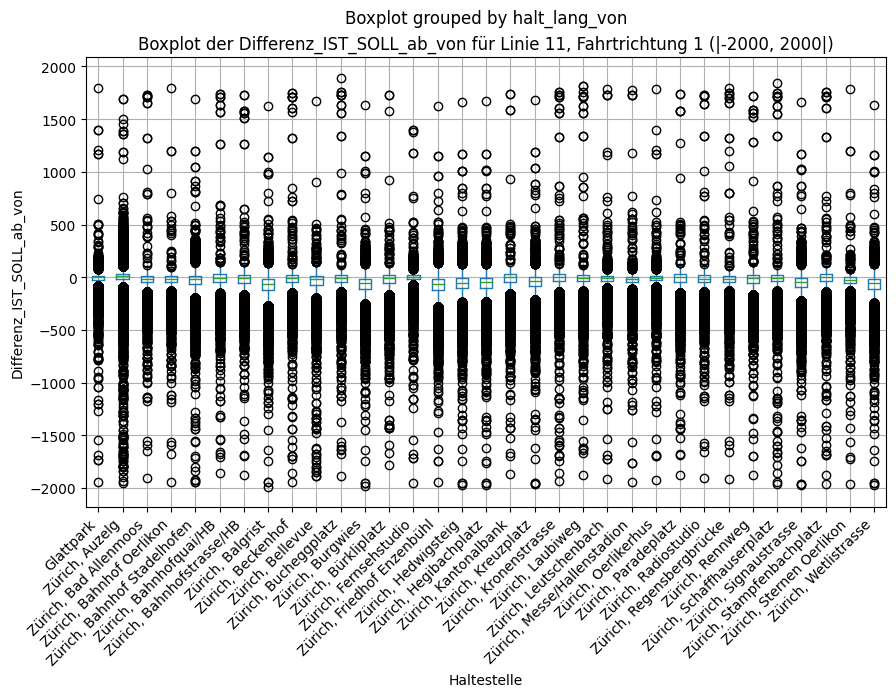

In [15]:
#Boxplot darstellen
# Aufteilen in Fahrtrichtung 1/2

import matplotlib.pyplot as plt

# Definiere DataFrame
df = fahrz_haltepkt_haltestelle.copy()

# Berechne Differenz zwischen 'soll_ab_von' und 'ist_ab_von' und generiere neue Spalte 'Differenz_IST_SOLL_ab_von'
df['Differenz_IST_SOLL_ab_von'] = df['soll_ab_von'] - df['ist_ab_von']
df['Differenz_IST_SOLL_an_von'] = df['soll_an_von'] - df['ist_an_von']
df['Differenz_ab_an_von'] = df['Differenz_IST_SOLL_ab_von'] - df['Differenz_IST_SOLL_an_von']

# Filtere Daten für Linie 11, Fahrtrichtung 1 und Differenz zwischen -2000 und 2000
filtered_df = df[(df['linie'] == 11) & (df['richtung'] == 1) & (df['Differenz_IST_SOLL_ab_von'].notna()) & (df['Differenz_IST_SOLL_ab_von'].between(-2000, 2000))]

# Filtere die Haltestellen basierend auf kurs_haltestellen_unique
filtered_df = filtered_df[filtered_df['halt_id_von'].isin(kurs_haltestellen_unique['halt_id_von'])]

# Erstelle Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
bp = filtered_df.boxplot(column=['Differenz_IST_SOLL_ab_von'], by=['halt_lang_von'], ax=ax, rot=90, grid=True)

# Passe das Format der Haltestellennamen an
plt.xticks(rotation=45, ha='right')

# Ändere den vertikalen Abstand zwischen den Subplots
fig.subplots_adjust(hspace=0.8)

# Setze Titel und Achsenbeschriftungen
plt.title('Boxplot der Differenz_IST_SOLL_ab_von für Linie 11, Fahrtrichtung 1 (|-2000, 2000|)')
plt.ylabel('Differenz_IST_SOLL_ab_von')
plt.xlabel('Haltestelle')

# Zeige den Boxplot an
plt.show()



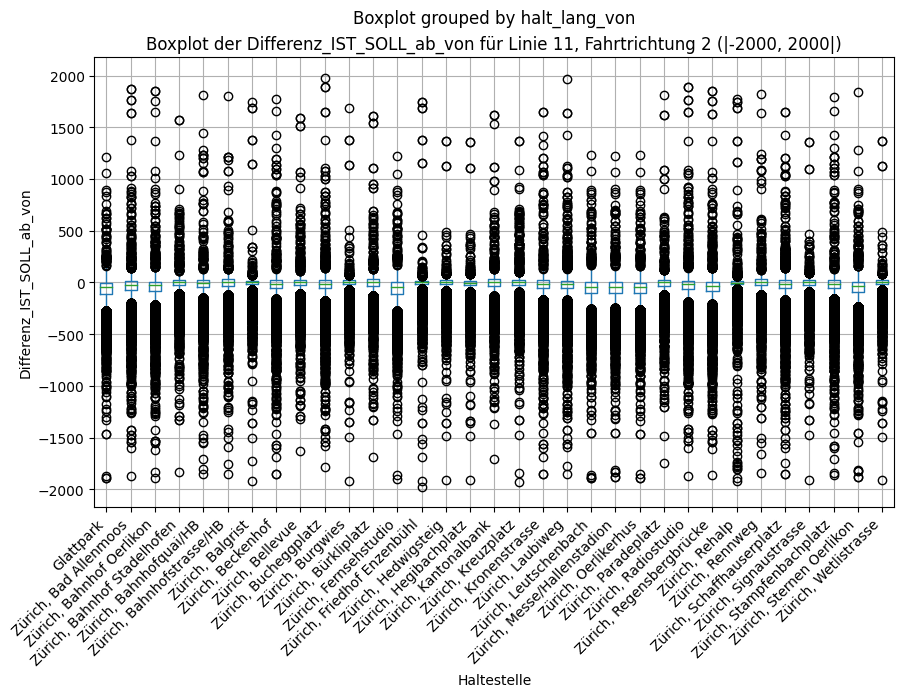

In [16]:
#Boxplot darstellen
# Aufteilen in Fahrtrichtung 2/2

import matplotlib.pyplot as plt

# Definiere DataFrame
df = fahrz_haltepkt_haltestelle.copy()

# Berechne Differenz zwischen 'soll_ab_von' und 'ist_ab_von' und generiere neue Spalte 'Differenz_IST_SOLL_ab_von'
df['Differenz_IST_SOLL_ab_von'] = df['soll_ab_von'] - df['ist_ab_von']
df['Differenz_IST_SOLL_an_von'] = df['soll_an_von'] - df['ist_an_von']
df['Differenz_ab_an_von'] = df['Differenz_IST_SOLL_ab_von'] - df['Differenz_IST_SOLL_an_von']

# Filtere Daten für Linie 11, Kurs 35, Fahrtrichtung 2 und Differenz zwischen -2000 und 2000
filtered_df = df[(df['linie'] == 11)  & (df['richtung'] == 2) & (df['Differenz_IST_SOLL_ab_von'].notna()) & (df['Differenz_IST_SOLL_ab_von'].between(-2000, 2000))]

# Filtere die Haltestellen basierend auf kurs_haltestellen_unique
filtered_df = filtered_df[filtered_df['halt_id_von'].isin(kurs_haltestellen_unique['halt_id_von'])]

# Erstelle Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
bp = filtered_df.boxplot(column=['Differenz_IST_SOLL_ab_von'], by=['halt_lang_von'], ax=ax, rot=90, grid=True)

# Passe das Format der Haltestellennamen an
plt.xticks(rotation=45, ha='right')

# Ändere den vertikalen Abstand zwischen den Subplots
fig.subplots_adjust(hspace=0.8)

# Setze Titel und Achsenbeschriftungen
plt.title('Boxplot der Differenz_IST_SOLL_ab_von für Linie 11, Fahrtrichtung 2 (|-2000, 2000|)')
plt.ylabel('Differenz_IST_SOLL_ab_von')
plt.xlabel('Haltestelle')

# Zeige den Boxplot an
plt.show()

## Visualisierung der Abfahrtsdifferenzen in Minuten
Zur vereinfachten Interpretation wird der Boxplot in eine Minutendarstellung umgeformt.

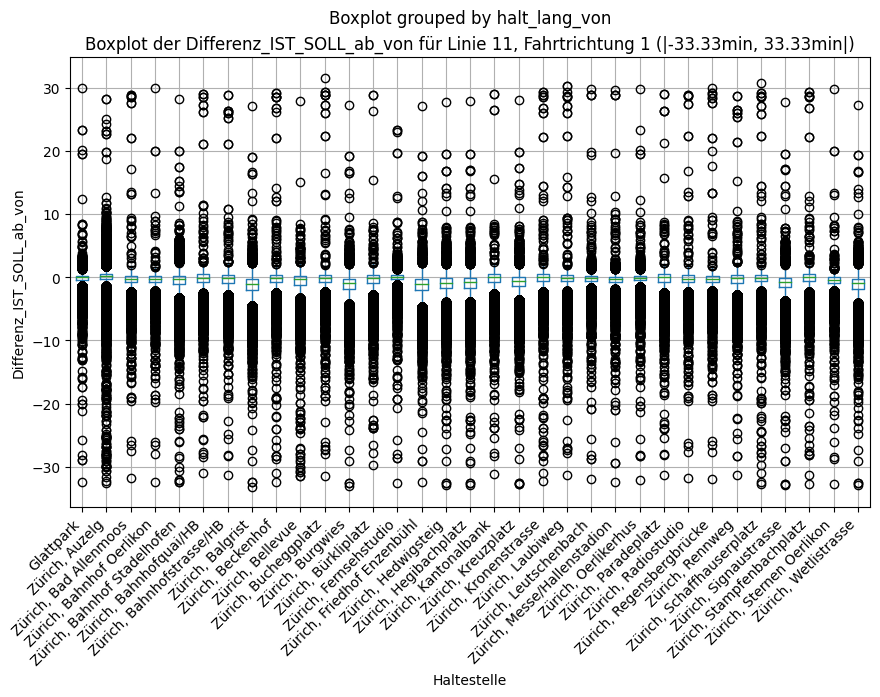

In [17]:
#Boxplot darstellen in Minuten
# Aufteilen in Fahrtrichtung 1/2

import matplotlib.pyplot as plt

# Definiere DataFrame
df = fahrz_haltepkt_haltestelle.copy()

# Berechne Differenz zwischen 'soll_ab_von' und 'ist_ab_von' und generiere neue Spalte 'Differenz_IST_SOLL_ab_von'
df['Differenz_IST_SOLL_ab_von'] = df['soll_ab_von'] /60 - df['ist_ab_von'] /60
df['Differenz_IST_SOLL_an_von'] = df['soll_an_von'] /60 - df['ist_an_von'] /60
df['Differenz_ab_an_von'] = df['Differenz_IST_SOLL_ab_von']  - df['Differenz_IST_SOLL_an_von' ]

# Filtere Daten für Linie 11, Kurs 35, Fahrtrichtung 1 und Differenz zwischen -33.33min, 33.33min
filtered_df = df[(df['linie'] == 11)  & (df['richtung'] == 1) & (df['Differenz_IST_SOLL_ab_von'].notna()) & (df['Differenz_IST_SOLL_ab_von'].between(-33.33, 33.33)) ]

# Filtere die Haltestellen basierend auf kurs_haltestellen_unique
filtered_df = filtered_df[filtered_df['halt_id_von'].isin(kurs_haltestellen_unique['halt_id_von'])]

# Erstelle Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
bp = filtered_df.boxplot(column=['Differenz_IST_SOLL_ab_von'], by=['halt_lang_von'], ax=ax, rot=90, grid=True)

# Passe das Format der Haltestellennamen an
plt.xticks(rotation=45, ha='right')

# Ändere den vertikalen Abstand zwischen den Subplots
fig.subplots_adjust(hspace=0.8)

# Setze Titel und Achsenbeschriftungen
plt.title('Boxplot der Differenz_IST_SOLL_ab_von für Linie 11, Fahrtrichtung 1 (|-33.33min, 33.33min|)')
plt.ylabel('Differenz_IST_SOLL_ab_von')
plt.xlabel('Haltestelle')

# Zeige den Boxplot an
plt.show()

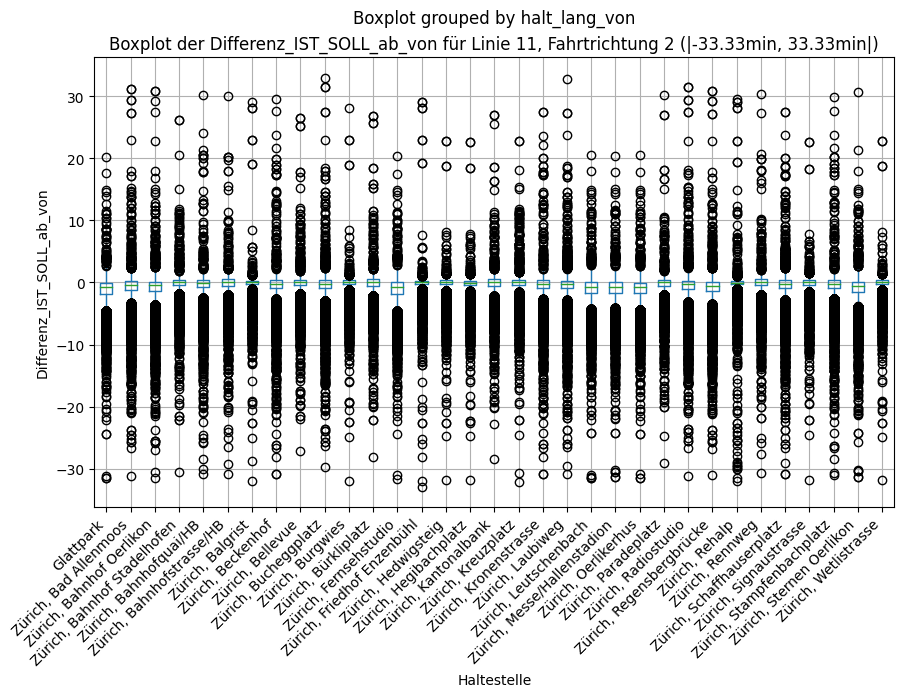

In [18]:
#Boxplot darstellen in Minuten
# Aufteilen in Fahrtrichtung 2/2

import matplotlib.pyplot as plt

# Definiere DataFrame
df = fahrz_haltepkt_haltestelle.copy()

# Berechne Differenz zwischen 'soll_ab_von' und 'ist_ab_von' und generiere neue Spalte 'Differenz_IST_SOLL_ab_von'
df['Differenz_IST_SOLL_ab_von'] = df['soll_ab_von'] /60 - df['ist_ab_von'] /60
df['Differenz_IST_SOLL_an_von'] = df['soll_an_von'] /60 - df['ist_an_von'] /60
df['Differenz_ab_an_von'] = df['Differenz_IST_SOLL_ab_von']  - df['Differenz_IST_SOLL_an_von' ]

# Filtere Daten für Linie 11, Kurs 35, Fahrtrichtung 2 und Differenz zwischen -33.33min, 33.33min
filtered_df = df[(df['linie'] == 11)  & (df['richtung'] == 2) & (df['Differenz_IST_SOLL_ab_von'].notna()) & (df['Differenz_IST_SOLL_ab_von'].between(-33.33, 33.33)) ]

# Filtere die Haltestellen basierend auf kurs_haltestellen_unique
filtered_df = filtered_df[filtered_df['halt_id_von'].isin(kurs_haltestellen_unique['halt_id_von'])]

# Erstelle Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
bp = filtered_df.boxplot(column=['Differenz_IST_SOLL_ab_von'], by=['halt_lang_von'], ax=ax, rot=90, grid=True)

# Passe das Format der Haltestellennamen an
plt.xticks(rotation=45, ha='right')

# Ändere den vertikalen Abstand zwischen den Subplots
fig.subplots_adjust(hspace=0.8)

# Setze Titel und Achsenbeschriftungen
plt.title('Boxplot der Differenz_IST_SOLL_ab_von für Linie 11, Fahrtrichtung 2 (|-33.33min, 33.33min|)')
plt.ylabel('Differenz_IST_SOLL_ab_von')
plt.xlabel('Haltestelle')

# Zeige den Boxplot an
plt.show()



### Analyse der Abfahrtsdifferenzen

Wie in den Boxplot-Grafiken zu sehen ist, sind die Boxen meist sehr klein, was auf sehr konsistente Daten und somit auf pünktliche Fahrzeiten schliessen könnte. Allerdings gibt es durch die grosse Datenmenge auch sehr viele Ausreisser, die das ganze ziemlich verzerren. Allerdings ist diese Darstellung interessant um zu sehen, in welcher Range und Häufigkeit die Ausreisser vorkommen.

Interessant ist, dass viele Fahrten tendenziell leicht zu früh stattfinden. Das ist am Strich in der Box, dem Median, erkennbar, der häufig unter der 0-Grenze (sekundengenau pünktlich) liegt. Zudem ist (auch wenn eher klein) gut sichtbar, welche Haltestellen eine konsistentere Pünktlichkeit haben, nämlich da, wo die Box sehr klein ist, beispielsweise die Halstenstelle Friedhof Enzenbühl, Wetlistrasse, Burgwies oder Hedwigsteig in der Richtung 2. Alle diese Haltestellen zeichnen sich dadurch aus, dass nur die Linie 11 an diesen Haltestellen verkehrt und sie sich ziemlich am Anfang der Strecke 2 befinden bzw. sogar der Ausgangspunkt (Rehalp) sind. Umgekehrt lässt sich das gleiche der Richtung 1 beobachten, da sind tendenziell die Boxen rund um den Ausgangspunkt Zürich Auzelg sehr klein, je länger ein Tram aber Richtung Rehalp unterwegs ist, desto mehr Streuung (Unpünktlichkeit) gibt es.
Daraus lässt sich die Hypothese aufstellen, dass die Verspätung mit der Anzahl passierter Knotenpunkte sowie mit der Gesamtdauer der Streckenfahrt zunimmt.


## Visualisierung der Abfahrtsdifferenzen mit Daten-Eingrenzung
Um das ganze noch besser analysieren zu können, wird stärker in den Boxplot "hereingezoomt", in dem die Ausreisser reduziert bzw. ausgeblendet werden. Es werden die Daten ausgefiltert, die über einem bestimmten Schwellenwert liegen. Als Schwellenwert wird der doppelte Interquartilsabstand über dem dritten Quartil oder unter dem ersten Quartil definiert. Ausreisser ausserhalb dieser Grenze werden nachfolgend nicht bzw. nicht in der Gesamtheit angezeigt.

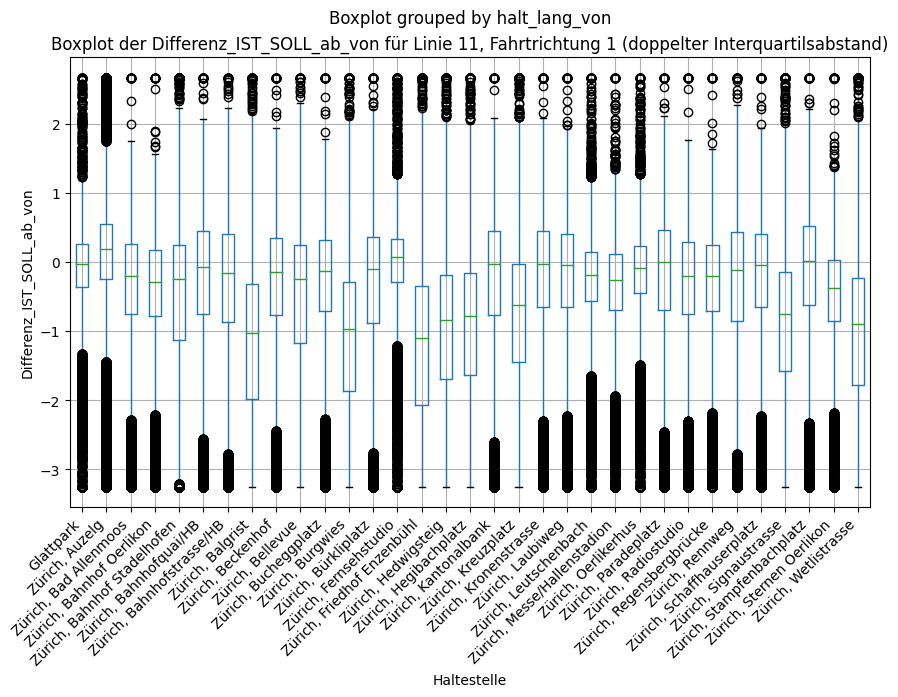

In [19]:
#Boxplot darstellen in Minuten, eingegrenzt auf das doppelte des Interquartilsabstands
# Aufteilen in Fahrtrichtung 1/2

import matplotlib.pyplot as plt

# Definiere DataFrame
df = fahrz_haltepkt_haltestelle.copy()

# Berechne Differenz zwischen 'soll_ab_von' und 'ist_ab_von' und generiere neue Spalte 'Differenz_IST_SOLL_ab_von'
df['Differenz_IST_SOLL_ab_von'] = df['soll_ab_von'] /60 - df['ist_ab_von'] /60
df['Differenz_IST_SOLL_an_von'] = df['soll_an_von'] /60 - df['ist_an_von'] /60
df['Differenz_ab_an_von'] = df['Differenz_IST_SOLL_ab_von']  - df['Differenz_IST_SOLL_an_von' ]

# Berechne den Interquartilsabstand (IQR)
Q1 = df['Differenz_IST_SOLL_ab_von'].quantile(0.25)
Q3 = df['Differenz_IST_SOLL_ab_von'].quantile(0.75)
IQR = Q3 - Q1

# Definiere die Grenzen für Ausreißer
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Ersetze Ausreißer mit den Grenzwerten
df['Differenz_IST_SOLL_ab_von'] = df['Differenz_IST_SOLL_ab_von'].clip(lower_bound, upper_bound)

# Filtere Daten für Linie 11, Kurs 35, Fahrtrichtung 1 und Differenz zwischen -33.33min, 33.33min
filtered_df = df[(df['linie'] == 11)  & (df['richtung'] == 1) & (df['Differenz_IST_SOLL_ab_von'].notna()) & (df['Differenz_IST_SOLL_ab_von'].between(-33.33, 33.33)) ]

# Filtere die Haltestellen basierend auf kurs_haltestellen_unique
filtered_df = filtered_df[filtered_df['halt_id_von'].isin(kurs_haltestellen_unique['halt_id_von'])]

# Erstelle Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
bp = filtered_df.boxplot(column=['Differenz_IST_SOLL_ab_von'], by=['halt_lang_von'], ax=ax, rot=90, grid=True)

# Passe das Format der Haltestellennamen an
plt.xticks(rotation=45, ha='right')

# Ändere den vertikalen Abstand zwischen den Subplots
fig.subplots_adjust(hspace=0.8)

# Setze Titel und Achsenbeschriftungen
plt.title('Boxplot der Differenz_IST_SOLL_ab_von für Linie 11, Fahrtrichtung 1 (doppelter Interquartilsabstand)')
plt.ylabel('Differenz_IST_SOLL_ab_von')
plt.xlabel('Haltestelle')

# Zeige den Boxplot an
plt.show()

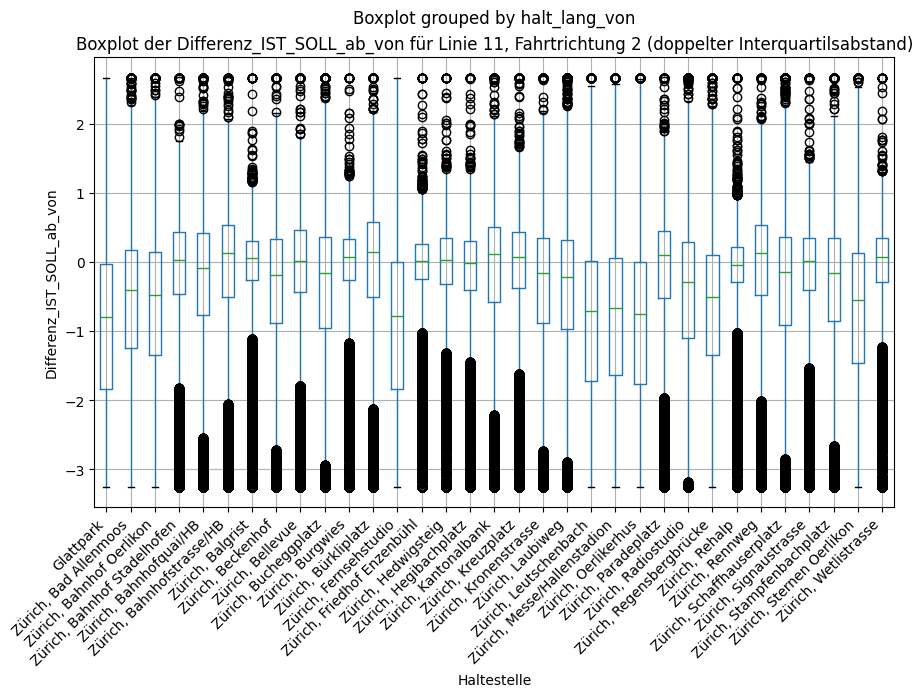

In [20]:
#Boxplot darstellen in Minuten, eingegrenzt auf das doppelte des Interquartilsabstands
# Aufteilen in Fahrtrichtung 2/2

import matplotlib.pyplot as plt

# Definiere DataFrame
df = fahrz_haltepkt_haltestelle.copy()

# Berechne Differenz zwischen 'soll_ab_von' und 'ist_ab_von' und generiere neue Spalte 'Differenz_IST_SOLL_ab_von'
df['Differenz_IST_SOLL_ab_von'] = df['soll_ab_von'] /60 - df['ist_ab_von'] /60
df['Differenz_IST_SOLL_an_von'] = df['soll_an_von'] /60 - df['ist_an_von'] /60
df['Differenz_ab_an_von'] = df['Differenz_IST_SOLL_ab_von']  - df['Differenz_IST_SOLL_an_von' ]

# Berechne den Interquartilsabstand (IQR)
Q1 = df['Differenz_IST_SOLL_ab_von'].quantile(0.25)
Q3 = df['Differenz_IST_SOLL_ab_von'].quantile(0.75)
IQR = Q3 - Q1

# Definiere die Grenzen für Ausreißer
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Ersetze Ausreißer mit den Grenzwerten
df['Differenz_IST_SOLL_ab_von'] = df['Differenz_IST_SOLL_ab_von'].clip(lower_bound, upper_bound)

# Filtere Daten für Linie 11, Kurs 35, Fahrtrichtung 2 und Differenz zwischen -33.33min, 33.33min
filtered_df = df[(df['linie'] == 11)  & (df['richtung'] == 2) & (df['Differenz_IST_SOLL_ab_von'].notna()) & (df['Differenz_IST_SOLL_ab_von'].between(-33.33, 33.33)) ]

# Filtere die Haltestellen basierend auf kurs_haltestellen_unique
filtered_df = filtered_df[filtered_df['halt_id_von'].isin(kurs_haltestellen_unique['halt_id_von'])]

# Erstelle Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
bp = filtered_df.boxplot(column=['Differenz_IST_SOLL_ab_von'], by=['halt_lang_von'], ax=ax, rot=90, grid=True)

# Passe das Format der Haltestellennamen an
plt.xticks(rotation=45, ha='right')

# Ändere den vertikalen Abstand zwischen den Subplots
fig.subplots_adjust(hspace=0.8)

# Setze Titel und Achsenbeschriftungen
plt.title('Boxplot der Differenz_IST_SOLL_ab_von für Linie 11, Fahrtrichtung 2 (doppelter Interquartilsabstand)')
plt.ylabel('Differenz_IST_SOLL_ab_von')
plt.xlabel('Haltestelle')

# Zeige den Boxplot an
plt.show()

### Analyse der eingegrenzten Abfahrtsdifferenzen
Bei dieser genaueren Betrachtung lassen sich die Boxen des Boxplots weitaus beser erkennen und analysieren, und auch die Haltestellen lassen sich nun genauer voneinander unterscheiden. Besonders gut ist so zu sehen, dass die Trams der Linie 11 tatsächlich im Median früher als die geplante Soll-Zeit losfahren.

Weiter zeigt sich auch hier noch einmal deutlich, dass es durchaus Unterschiede zwischen Richtung 1 und 2 gibt, was sich jeweils auf die Verspätung bei den jeweiligen Haltestellen auswirkt.

Besonders gut zeigt sich in dieser Darstellung, dass 50% aller Fahrten pünktlich sind, da die Box für alle Haltestellen nie die 2-Minuten-Grenze überschreitet und sich viele Boxen sogar im +-1-Minuten-Bereich bewegen. Ausserdem ist bei vielen Haltestellen eine sehr dichte Verteilung der Ausreisser sichtbar, die ebenfalls noch als "pünktlich" oder allenfalls als "leicht verspätet" (bis +-3 Minuten) gelten würden.

## Visualisierung der Abfahrtsdiffenzen nach Monat

<Figure size 1000x600 with 0 Axes>

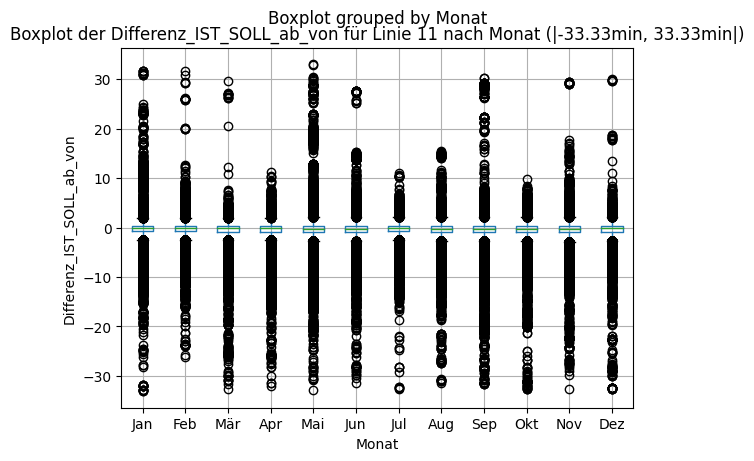

In [21]:
#Boxplot darstellen Monate
import matplotlib.pyplot as plt
import pandas as pd

df = fahrz_haltepkt_haltestelle.copy()

# Differenz zwischen 'soll_ab_von' und 'ist_ab_von' berechnen und neue Spalte 'Differenz_IST_SOLL_ab_von' erstellen, in Minuten
df['Differenz_IST_SOLL_ab_von'] = df['soll_ab_von'] /60 - df['ist_ab_von'] /60

# Datumsinformationen extrahieren
df['Datum_von'] = pd.to_datetime(df['datum_von'])
df['Monat'] = df['Datum_von'].dt.month

# Daten für Linie 11 filtern und auf Werte im Bereich von +/- 33.33Min beschränken
filtered_df = df[(df['linie'] == 11) & (df['Differenz_IST_SOLL_ab_von'].between(-33.33, 33.33))]

# Filtere die Haltestellen basierend auf kurs_haltestellen_unique
filtered_df = filtered_df[filtered_df['halt_id_von'].isin(kurs_haltestellen_unique['halt_id_von'])]

# Boxplot erstellen
plt.figure(figsize=(10, 6))  # Größe des Plots anpassen
filtered_df.boxplot(column=['Differenz_IST_SOLL_ab_von'], by=['Monat'])
plt.title('Boxplot der Differenz_IST_SOLL_ab_von für Linie 11 nach Monat (|-33.33min, 33.33min|)')
plt.ylabel('Differenz_IST_SOLL_ab_von')
plt.xlabel('Monat')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'])
plt.show()


### Analyse der Abfahrtsdifferenzen nach Monat
In dieser Visualisierung werden die monatlichen Unterschiede hervorgehoben. Vor allem die grossen Ausreisser (grosse Verspätungen) werden in dieser Darstellung besonders gezeigt. Allerdings müssten weitere Daten hinzugezogen werden, um die Ursachen für die Ausreisser genauer zu ergründen. So ist beispielsweise unklar, warum es im Mai eine grössere Streuung gibt, da diese beispielsweise eher in den Wintermonaten vermutet werden würde. Zudem ist in dieser vollständigen Darstellung unklar, wo eine stärkere Konzentration vorhanden ist, da sich die Datenpunkte stark überlagern.

## Zählung der Verspätungen nach Monat

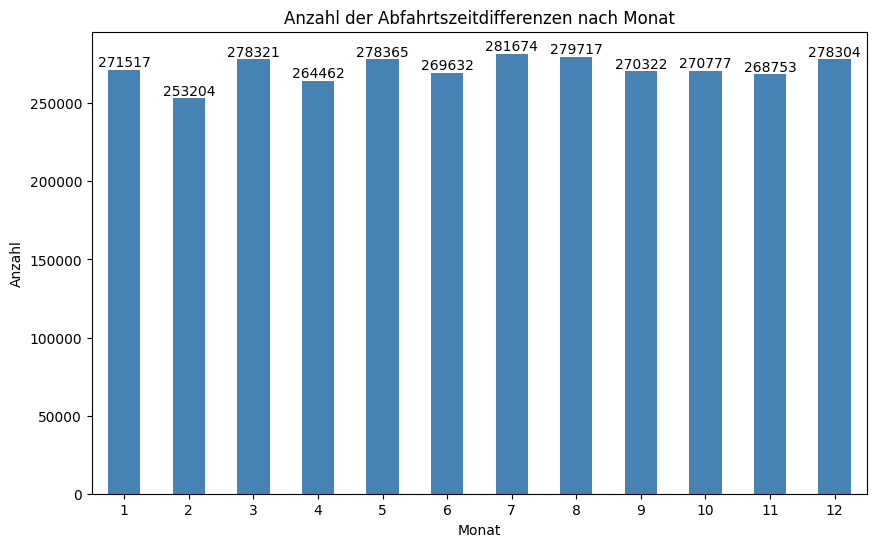

In [22]:
#Anzahl Differenz von plusminus 120 sekunden
import pandas as pd
import matplotlib.pyplot as plt

# Definieren Sie Ihren DataFrame mit den relevanten Daten
df = fahrz_haltepkt_haltestelle.copy()

# Wenden Sie pd.to_datetime() auf die relevanten Spalten an
df['soll_ab_von'] = pd.to_datetime(df['soll_ab_von'])
df['ist_ab_von'] = pd.to_datetime(df['ist_ab_von'])

# Berechnen Sie die Abfahrtszeitdifferenzen in Minuten
df['Differenz_IST_SOLL_ab_von'] = (df['soll_ab_von'] - df['ist_ab_von']).dt.total_seconds() / 60

# Extrahieren Sie den Monat aus dem Datum
df['Datum_von'] = pd.to_datetime(df['datum_von'])
df['Monat'] = df['Datum_von'].dt.month

# Filtere die Haltestellen basierend auf kurs_haltestellen_unique
filtered_df = df[filtered_df['halt_id_von'].isin(kurs_haltestellen_unique['halt_id_von'])& (df['Differenz_IST_SOLL_ab_von'].between(-2000, 2000))]

# Gruppieren Sie die Anzahl der Abfahrtszeitdifferenzen nach Monat
count_df = filtered_df.groupby('Monat')['Differenz_IST_SOLL_ab_von'].count()

# Erstellen Sie das Balkendiagramm
plt.figure(figsize=(10, 6))
bars = count_df.plot(kind='bar', color='steelblue')
plt.title('Anzahl der Abfahrtszeitdifferenzen nach Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)

# Fügen Sie Beschriftungen zu den Säulen hinzu
for bar in bars.patches:
  plt.text(bar.get_x() + bar.get_width() / 2,
           bar.get_height(),
           int(bar.get_height()),
           ha='center',
           va='bottom')

plt.show()

### Analyse Verspätungszählung
Es zeigt sich, dass sich die Anzahl Verspätungen von Monat zu Monat auf relativ ähnlichem Niveau bewegen. Es lässt sich kein saisonaler Trend an der reinen Anzahl der unpünktlichen Fahrten (Verspätungen und zu frühe Abfahrt, unabhängig von der Dauer der Verspätung / zu frühen Fart) feststellen. Weder scheinen die Wintermonate besonders viele, noch die Sommermonate und Ferienzeit besonders wenige unpünktliche Fahrten zu generieren.

## Visualisierung der Abfahrtszeiten nach Fahrtrichtung

<Figure size 1000x600 with 0 Axes>

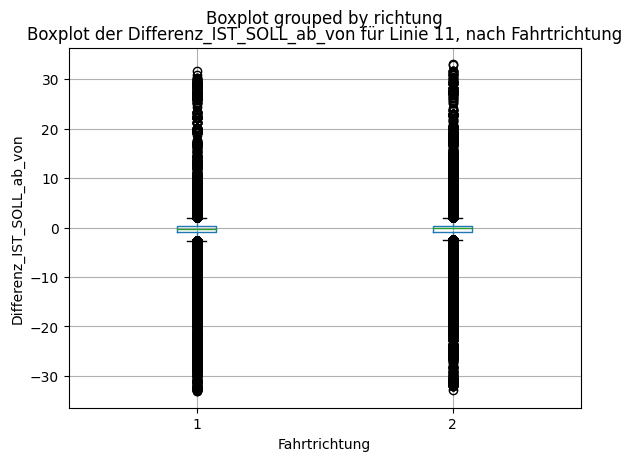

In [23]:
#Boxplot nach Fahrrichtung
import matplotlib.pyplot as plt
import pandas as pd

# CSV-Datei einlesen
df = fahrz_haltepkt_haltestelle.copy()

# Differenz zwischen 'soll_ab_von' und 'ist_ab_von' berechnen und neue Spalte 'Differenz_IST_SOLL_ab_von' erstellen
df['Differenz_IST_SOLL_ab_von'] = df['soll_ab_von'] /60 - df['ist_ab_von'] /60

# Daten für Linie 11 und Kurs 35 filtern
filtered_df = df[(df['linie'] == 11) & (df['Differenz_IST_SOLL_ab_von'].between(-33.33, 33.33))]

# Filtere die Haltestellen basierend auf kurs_haltestellen_unique
filtered_df = filtered_df[filtered_df['halt_id_von'].isin(kurs_haltestellen_unique['halt_id_von'])]

# Boxplot erstellen
plt.figure(figsize=(10, 6))  # Größe des Plots anpassen
filtered_df.boxplot(column=['Differenz_IST_SOLL_ab_von'], by=['richtung'])
plt.title('Boxplot der Differenz_IST_SOLL_ab_von für Linie 11, nach Fahrtrichtung')
plt.ylabel('Differenz_IST_SOLL_ab_von')
plt.xlabel('Fahrtrichtung')
plt.show()



Da dieser Boxplot durch die Datenmenge keine genaue Analyse zulässt, werden auch hier wieder die unpünktlichen Fahrten gezählt.

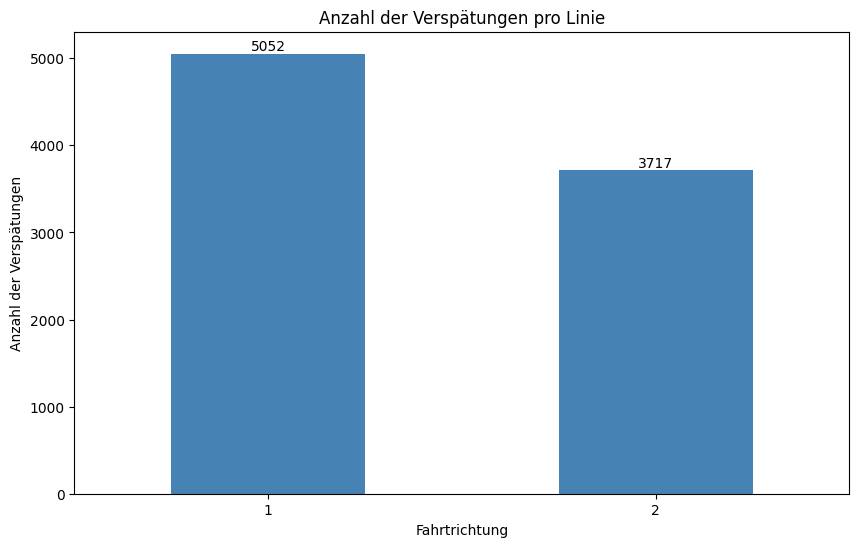

In [24]:
#Anzahl Differenz von plusminus 120 sekunden
import matplotlib.pyplot as plt
import pandas as pd

# CSV-Datei einlesen
df = fahrz_haltepkt_haltestelle.copy()

# Differenz zwischen 'soll_ab_von' und 'ist_ab_von' berechnen und neue Spalte 'Differenz_IST_SOLL_ab_von' erstellen
df['Differenz_IST_SOLL_ab_von'] = df['soll_ab_von'] /60 - df['ist_ab_von'] /60

# Daten für Linie 11 und Kurs 35 filtern
filtered_df = df[(df['linie'] == 11) & (df['Differenz_IST_SOLL_ab_von'].between(-33.33, 33.33))]

df['Verspaetung'] = df['Differenz_IST_SOLL_ab_von'] > 2

# Daten für Linie 11 filtern und Verspätungen zählen
count_df = df[df['Verspaetung']].groupby('richtung')['Verspaetung'].count()

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))  # Größe des Plots anpassen
bars = count_df.plot(kind='bar', color='steelblue')
plt.title('Anzahl der Verspätungen pro Linie')
plt.ylabel('Anzahl der Verspätungen')
plt.xlabel('Fahrtrichtung')
plt.xticks(rotation=0)

# Beschriftungen zu den Säulen hinzufügen
for bar in bars.patches:
  plt.text(bar.get_x() + bar.get_width() / 2,
           bar.get_height(),
           int(bar.get_height()),
           ha='center',
           va='bottom')

plt.show()


### Analyse Verspätungszählung nach Fahrtrichtung
In dieser Darstellung zeigt sich, dass die Fahrtrichtung 1 bedeutend unpünktlicher zu sein scheint als die Gegenrichtung. So wurden in der Fahrtrichtung 1 1335 unpünktliche Fahrten mehr registriert als in Fahrtrichtung 2. Hier lassen sich die Gründe dafür nicht aus der Visualisierung ablesen, dazu müssten weitere Informationen vorliegen bzw. analysiert werden.

## Dashboard

Mittels eines Dashboards sollen Informationen zur durchschnittlichen Unpünktlichkeit eines Trams dargestellt werden, sowie ob die Unpünktlichkeit jeweils durch ein zu frühes oder zu späten eintreffen des Trams verursacht wird. Mit dieser Grafik dient zum besseren Verständnis für Personen, welche keine analytische Kenntnisse besitzen.

Wichtig zu beachten ist, dass die Prozentzahlen 'zu früh' und 'zu spät' sich nur auf die unpünktlichen Fahrten beziehen und nicht auf die Gesamtheit der Fahrten.

Die Grafik könnte in Zukunft auf alle Haltestellen ausgeweitet und mit zusätzlichen Informationen zur Fahrtrichtung angereichert werden.

In [25]:
#Dashboard erstellen
!pip install plotly

import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio

# Definieren des DataFrames
df = fahrz_haltepkt_haltestelle.copy()

# Filtern nach Haltestellen der Linie 11
df = df[df['halt_id_von'].isin(kurs_haltestellen_unique['halt_id_von'])]

# Berechnung der Differenz "von" zwischen 'soll_ab_von' und 'ist_ab_von' zur Generierung einer neuen Spalte 'Differenz_IST_SOLL_ab_von'
df['Differenz_IST_SOLL_ab_von'] = (df['soll_ab_von'] - df['ist_ab_von'])

# Filtern der Daten, um nur die zu spät kommenden Trams zu berücksichtigen
df_zu_spät = df[df['Differenz_IST_SOLL_ab_von'] > 2]

# Berechnung des Prozentsatzes der verspäteten Trams
prozent_verspätet = (df_zu_spät.shape[0] / df.shape[0]) * 100

# Durchschnittliche Verspätung in Minuten, nur für die zu spät kommenden Trams
durchschnittliche_verspätung = df_zu_spät['Differenz_IST_SOLL_ab_von'].median()

# Filtern der Daten, um nur die zu früh kommenden Trams zu berücksichtigen
df_zu_früh = df[df['Differenz_IST_SOLL_ab_von'] < -2]

# Berechnung des Prozentsatzes der zu früh kommenden Trams
prozent_zu_früh = (df_zu_früh.shape[0] / df.shape[0]) * 100


# Erstellen des Dashboards
fig = go.Figure()

fig.add_trace(
    go.Indicator(
        mode="number",
        value=durchschnittliche_verspätung,
        title={'text': "Durchschnittliche<br>Verspätung", 'font': {'size': 18}},
        number={'suffix': " Sekunden", 'font': {'size': 24}},
        domain={'x': [0, 0.33], 'y': [0, 0.5]}
    )
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=prozent_zu_früh,
        title={'text': "Prozent<br>zu früh", 'font': {'size': 18}},
        number={'suffix': "%", 'font': {'size': 24}},
        domain={'x': [0.33, 0.66], 'y': [0, 0.5]}
    )
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=prozent_verspätet,
        title={'text': "Prozent<br>zu spät", 'font': {'size': 18}},
        number={'suffix': "%", 'font': {'size': 24}},
        domain={'x': [0.66, 0.99], 'y': [0, 0.5]}
    )
)


# Anpassung des Layouts
fig.update_layout(
    title='<b>Tram-Unpünktlichkeits-Dashboard<b>',
    template='plotly_dark',
    height=300,
    width=800,
    margin=dict(l=20, r=20, t=60, b=20),
)

# Anzeigen des Dashboards
pio.show(fig)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Linie grafisch auf einer Map darstellen
Die Linie und ihre Haltestellen sollen visuell auf einer Karte sichbar gemacht werden, um ein besseres Bild über die Strecke zu erhalten.

## Datenanalyse (Analyse Data)
*Der erster Code-Block muss nur ausgeführt werden, wenn 'fahrz_haltepkt_haltestelle' nochmals definiert werden muss bzw. noch nie definiert wurde.*


In [26]:
#Grundlegend von Anfang
### Nur ausführen wenn 'fahrz_haltepkt_haltestelle' nicht definiert ist.

# Load packages
import os
import pandas as pd


haltepunkt = pd.read_csv("Haltepunkt.csv")
haltestelle = pd.read_csv("Haltestelle.csv")


#### Load table "fahrzeiten": the travel time data is stored there
fahrz = pd.read_csv('Linie-11_Fahrzeiten_SOLL_IST_2022.csv')

#### Matching ###
# In order to get the full stops information, you need to match fahrz with haltepunkt and haltestelle

#### match fahrz with the stop points from haltepunkt according to the departure stop point
#### ("from"; german: "von")
fahrz_haltepkt_from = pd.merge(fahrz,haltepunkt,how="left",
                         left_on=["halt_punkt_id_von","halt_punkt_diva_von","halt_id_von"],
                         right_on=["halt_punkt_id","halt_punkt_diva","halt_id"])

# adjust variables names
fahrz_haltepkt_from.rename(columns={'GPS_Latitude': 'GPS_Latitude_von', 'GPS_Longitude': 'GPS_Longitude_von',
                               'GPS_Bearing': 'GPS_Bearing_von', 'halt_punkt_ist_aktiv': 'halt_punkt_ist_aktiv_von'},
                      inplace=True)

#### match fahrz with the stop points from haltepunkt according to the destination stop point
#### ("to"; german: "nach")
fahrz_haltepkt = pd.merge(fahrz_haltepkt_from,haltepunkt,how="left",
                         left_on=["halt_punkt_id_nach","halt_punkt_diva_nach","halt_id_nach"],
                         right_on=["halt_punkt_id","halt_punkt_diva","halt_id"])

# adjust variables names
fahrz_haltepkt.rename(columns={'GPS_Latitude': 'GPS_Latitude_nach', 'GPS_Longitude': 'GPS_Longitude_nach',
                               'GPS_Bearing': 'GPS_Bearing_nach', 'halt_punkt_ist_aktiv': 'halt_punkt_ist_aktiv_nach'},
                      inplace=True)


#### match fahrz_haltepkt with the stop names from haltestelle according to the stop point of departure
#### ("from"; german: "von")
fahrz_haltepkt_haltestelle_from = pd.merge(fahrz_haltepkt,haltestelle,how="left",
                         left_on=["halt_id_von","halt_diva_von","halt_kurz_von1"],
                         right_on=["halt_id","halt_diva","halt_kurz"])

# adjust variables names
fahrz_haltepkt_haltestelle_from.rename(columns={'halt_lang': 'halt_lang_von', 'halt_ist_aktiv': 'halt_ist_aktiv_von'},
                      inplace=True)

#### match fahrz_haltepkt_haltestelle_from with the stop names from haltestelle according to the destination stop point
#### ("to"; german: "nach")
fahrz_haltepkt_haltestelle = pd.merge(fahrz_haltepkt_haltestelle_from,haltestelle,how="left",
                         left_on=["halt_id_nach","halt_diva_nach","halt_kurz_nach1"],
                         right_on=["halt_id","halt_diva","halt_kurz"])

# adjust variables names
fahrz_haltepkt_haltestelle.rename(columns={'halt_lang': 'halt_lang_nach', 'halt_ist_aktiv': 'halt_ist_aktiv_nach'},
                      inplace=True)




<ipython-input-26-93c77e31d816>:54: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'halt_id_x'} in the result is deprecated and will raise a MergeError in a future version.



In [27]:
#Kurs 35 ist der Korrekte Kurs

#Variable definieren
Kurs_filter = 35
Richtung_filter = 2

#Filtern nach Kurs und Richtung aufgrund Variable
kurs_selected_rows = fahrz_haltepkt_haltestelle[(fahrz_haltepkt_haltestelle['kurs'] == Kurs_filter) & (fahrz_haltepkt_haltestelle['richtung'] == Richtung_filter)]
kurs_selected_rows_unique = kurs_selected_rows.drop_duplicates(subset='halt_lang_von')

#show kurs_selected_rows_unique (optional)
kurs_selected_rows_unique


,linie,richtung,betriebsdatum,fahrzeug,kurs,seq_von,halt_diva_von,halt_punkt_diva_von,halt_kurz_von1,datum_von,...,halt_id_x,halt_diva_x,halt_kurz_x,halt_lang_von,halt_ist_aktiv_von,halt_id_y,halt_diva_y,halt_kurz_y,halt_lang_nach,halt_ist_aktiv_nach
3219152,11,2,31.12.22,4029,35,1,2572,2,SOER,31.12.22,...,1311,2572,SOER,"Zürich, Sternen Oerlikon",True,2300,6033,DEP8,"Zürich, Depot 8 Oerlikon",True
3219705,11,2,31.12.22,4029,35,30,1552,1,LEUT,31.12.22,...,1443,1552,LEUT,"Zürich, Leutschenbach",True,2257,6459,ZOER,"Zürich, Oerlikerhus",True
3220758,11,2,31.12.22,4029,35,24,2017,1,RADI,31.12.22,...,1525,2017,RADI,"Zürich, Radiostudio",True,2090,144,BADA,"Zürich, Bad Allenmoos",True
3223512,11,2,31.12.22,4029,35,33,6460,1,ZFER,31.12.22,...,1928,6460,ZFER,"Zürich, Fernsehstudio",True,2083,132,ZAUZ,"Zürich, Auzelg",True
3224458,11,2,31.12.22,4029,35,15,2054,1,RENN,31.12.22,...,2035,2054,RENN,"Zürich, Rennweg",True,1895,416,BSTR,"Zürich, Bahnhofstrasse/HB",True
3226569,11,2,31.12.22,4029,35,19,435,1,BECK,31.12.22,...,2086,435,BECK,"Zürich, Beckenhof",True,2087,1468,KRON,"Zürich, Kronenstrasse",True
3228120,11,2,31.12.22,4029,35,11,440,1,BELL,31.12.22,...,1565,440,BELL,"Zürich, Bellevue",True,2590,615,BURK,"Zürich, Bürkliplatz",True
3229843,11,2,31.12.22,4029,35,25,144,1,BADA,31.12.22,...,2090,144,BADA,"Zürich, Bad Allenmoos",True,2089,2045,REGB,"Zürich, Regensbergbrücke",True
3230940,11,2,31.12.22,4029,35,23,564,1,BUCH,31.12.22,...,1309,564,BUCH,"Zürich, Bucheggplatz",True,1525,2017,RADI,"Zürich, Radiostudio",True
3231743,11,2,31.12.22,4029,35,5,2879,1,WETL,31.12.22,...,2110,2879,WETL,"Zürich, Wetlistrasse",True,2308,1138,HEDW,"Zürich, Hedwigsteig",True


## Datenpräsentation (Present Information)
Hier ist zu beachten, dass die gefilterte Tabelle nun alle relevanten Haltestellen beinhaltet, diese aber nicht zwingend in chronologischer Reihenfolge liegen.

Daher wurde folgender Ansatz herbei gezogen, um die Haltestelle in der korrekten Reihenfolge zu verbinden.

Zuerst muss definiert werden, welches die beginnende Haltestelle ist. Der Datensatz besteht dabei immer aus einer Von-Haltestelle und einer Nach-Haltestelle, welche das einzelne Linien Segment charakterisieren. Um nun das erste Segment fortzusetzen, wird im Dataframe in den Von-Haltestellen immer die vorhergehend gezeichnete Nach-Haltestelle gesucht.

In [28]:
#Linie einzeichnen mit Linie allerdings mit Startpunkt definition damit der Code weiss wo anfangen da Datensätze nicht zwingend in chronologischer Reihenfolge stehen.
# im oberen Code kann die Richtung gewählt werden. aufgrund dessen muss die Startposition gewählt werden.


import folium

#Startpunkt definieren
#startpunkt = 'Zürich, Auzelg'
startpunkt = 'Zürich, Rehalp'


# Zentriere die Karte auf Zürich
map_center = [47.3769, 8.5417]  # Koordinaten von Zürich

# Erstelle eine leere Karte
map_stops = folium.Map(location=map_center, zoom_start=12)

# Erstelle eine Liste für die Koordinaten der Linien
line_coordinates = []

# Filtere den DataFrame nach dem Startpunkt 'Zürich, Auzelg'

filtered_rows = kurs_selected_rows_unique[kurs_selected_rows_unique['halt_lang_von'] == startpunkt].reset_index(drop=True)

# Iteriere über die Zeilen des gefilterten DataFrames
for index, row in filtered_rows.iterrows():
    halt_lang_von = row['halt_lang_von']
    latitude_von = row['GPS_Latitude_von']
    longitude_von = row['GPS_Longitude_von']
    halt_lang_nach = row['halt_lang_nach']
    latitude_nach = row['GPS_Latitude_nach']
    longitude_nach = row['GPS_Longitude_nach']

    # Füge einen Marker für den Startpunkt hinzu
    folium.Marker(
        location=[latitude_von, longitude_von],
        tooltip=halt_lang_von,
        icon=folium.Icon(color='blue')
    ).add_to(map_stops)

    # Füge einen Marker für den Zielpunkt hinzu
    folium.Marker(
        location=[latitude_nach, longitude_nach],
        tooltip=halt_lang_nach,
        icon=folium.Icon(color='red')
    ).add_to(map_stops)

    # Füge die Koordinaten zur Linienliste hinzu
    line_coordinates.append([(latitude_von, longitude_von), (latitude_nach, longitude_nach)])

    # Suche den nächsten Halt (halt_lang_nach) im DataFrame
    while True:
        next_stop = kurs_selected_rows_unique[kurs_selected_rows_unique['halt_lang_von'] == halt_lang_nach].reset_index(drop=True)
        if next_stop.empty:
            break
        next_latitude = next_stop.iloc[0]['GPS_Latitude_von']
        next_longitude = next_stop.iloc[0]['GPS_Longitude_von']
        next_halt_lang_nach = next_stop.iloc[0]['halt_lang_nach']

        # Füge einen Marker für den nächsten Halt hinzu
        folium.Marker(
            location=[next_latitude, next_longitude],
            tooltip=next_halt_lang_nach,
            icon=folium.Icon(color='blue')
        ).add_to(map_stops)

        # Füge die Koordinaten zur Linienliste hinzu
        line_coordinates.append([(latitude_nach, longitude_nach), (next_latitude, next_longitude)])

        # Aktualisiere die Variablen für den nächsten Schleifendurchlauf
        halt_lang_nach = next_halt_lang_nach
        latitude_nach = next_latitude
        longitude_nach = next_longitude

# Verbinde die Haltepunkte mit Linien
for coordinates in line_coordinates:
    folium.PolyLine(coordinates, color='green').add_to(map_stops)

# Zeige die Karte an
map_stops


In [29]:
#Haltestellen auf Map einzeichen ohne Linie

import folium

# Zentriere die Karte auf Zürich
map_center = [47.3769, 8.5417]  # Koordinaten von Zürich

# Erstelle eine leere Karte
map_stops = folium.Map(location=map_center, zoom_start=12)

# Iteriere über die Zeilen des DataFrame und füge Marker für jede Haltestelle hinzu
for index, row in kurs_selected_rows_unique.iterrows():
    halt_lang_von = row['halt_lang_von']
    latitude_von = row['GPS_Latitude_von']
    longitude_von = row['GPS_Longitude_von']

    # Füge einen Marker für die Haltestelle hinzu
    folium.Marker(
        location=[latitude_von, longitude_von],
        tooltip=halt_lang_von,
        icon=folium.Icon(color='blue')
    ).add_to(map_stops)

# Zeige die Karte an
map_stops




# Fazit und kritische Würdigung
Die verschiedenen Datenanalysen bzw. grafischen Auswertungen zeigen, dass die VBZ-Linie 11 grundsätzlich sehr pünktlich ist. Auch wenn es mal eine Verspätung gibt, ist diese nur in Ausnahmefällen sehr gross. Wie auf dem Dashboard zu sehen ist, ist der Median der Verspätungen bei gerade einmal 25 Sekunden. Die Ursachen dafür können vielfältig sein, dies wurde in dieser Analyse allerdings nicht weiter untersucht. Wenn die VBZ die Verspätungen verringern möchten, wäre es die einfachste Methode, wenn die VBZ die interne Definition einer Verspätung auf 3 Minuten erhöhen würde, wie es beispielsweise die SBB macht :)

Besonders interessant finden die Studierenden, dass eine Fahrtrichtung signifikant mehr Verspätungen aufweist als die andere. Auch spannend ist die Tatsache, dass es entgegen der Erwartungen der Studierenden keine feststellbaren saisonalen Unterschiede in der Anzahl unpünktlicher Fahrten gab. Hier wäre allerdings eine Untersuchung, die mehrere Jahre zurückgreift, durchaus interessant, da sich dann ggf. doch saisonale Unterschiede feststellen lassen könnten.

Diese Datenanalyse hat die Studierenden von Beginn weg gefordert, angefangen bei der Verarbeitung der grossen Datenmenge über die Zusammenführung und Berechnung bis hin zur Darstellung und Interpretation der Daten. Verwirrung stiftete auch die Tatsache, dass die Linie 11 nach VBZ zwar eine klar definierte Streckenführung hat, die Daten aber aufgrund von unterschiedlichen Kurs-Werten noch weitere Haltestellen enthalten, welche für diese Arbeit nicht relevant waren. Eine Schwierigkeit war es, eine saubere Haltestellen-Liste zu erhalten für die Fahrtrichtungen Zürich Auzelg und Rehalp. Es zeigt sich, dass eine solche Analyse nicht unterschätzt werden darf und vor allem auch stets ein kritischer Blick wichtig ist, um zu prüfen, ob die generierten Auswertungen tatsächlich statistisch korrekt gemacht wurden, um interpretierbar zu sein.

Die gewählten Forschungsziele werden rückblickend kritisch gesehen, da vor allem das erste Ziel "Visualisierung der Abfahrtsdifferenzen zur Ermittlung der Verspätungen" nicht sehr konkret ist bzw. keine Forschungsfrage darstellt, die konkret beantwortet werden kann. Allerdings freut es die Studierenden, dass die Forschungsfrage "Hat die Fahrtrichtung einen Einfluss auf die Verspätung?" mit einem klaren JA beantwortet werden kann, und dass auch das 3. Ziel "Visualisierung der Haltestellen" erreicht werden konnte.



## Nachruf

Diese Arbeit hat uns wieder einmal schmerzlich vor Augen geführt, dass wir kein Teammitglied als selbstverständlich erachten dürfen. Mit tiefer Trauer und grosser Bestürzung mussten wir erfahren, dass unser geschätzter Freund Daniel Koller am 18. April 2023 verstorben ist. Daniel war seit Beginn des Studiums ein hoch geschätztes Mitglied unseres Projektteams. Wir bedauern es sehr, dass wir diese Arbeit sowie das ganze Studium nicht gemeinsam mit ihm abschliessen können.


# Literaturverzeichnis
Titelbild: https://www.stadt-zuerich.ch/vbz/de/index.html, aufgerufen am 13.06.2023

ChatGPT Model 4, https://chat.openai.com/?model=gpt-4, zuletzt aufgerufen am 14.06.2023

Open Data Plattform Zürich, https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd, zuletzt aufgerufen am 14.06.2023

Stadt Zürich, https://www.stadt-zuerich.ch/vbz/de/index/fahrplan/haltestellen_linien.html, zuletzt aufgerufen am 13.06.2023

VBZ-Github-Repository, https://github.com/VerkehrsbetriebeZuerich, zuletzt aufgerufen am 14.06.2023

Download Link Perl Compiler, https://strawberryperl.com, zuletzt aufgerufen 15.06.2023



